In [6]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [7]:
import tensorflow as tf
from tensorflow import keras

In [10]:
pip install scikit-learn

                                              0.0/9.3 MB ? eta -:--:--
                                              0.1/9.3 MB 2.6 MB/s eta 0:00:04
     -                                        0.3/9.3 MB 4.1 MB/s eta 0:00:03
     --                                       0.7/9.3 MB 5.3 MB/s eta 0:00:02
     ----                                     1.0/9.3 MB 5.0 MB/s eta 0:00:02
     ------                                   1.4/9.3 MB 5.7 MB/s eta 0:00:02
     ------                                   1.6/9.3 MB 5.9 MB/s eta 0:00:02
     ---------                                2.2/9.3 MB 6.7 MB/s eta 0:00:02
     -----------                              2.6/9.3 MB 6.9 MB/s eta 0:00:01
     ------------                             2.9/9.3 MB 6.8 MB/s eta 0:00:01
     --------------                           3.3/9.3 MB 7.3 MB/s eta 0:00:01
     ----------------                         3.8/9.3 MB 7.6 MB/s eta 0:00:01
     ------------------                       4.4/9.3 MB 8.0 MB/s eta 0

In [11]:
from sklearn import datasets

In [12]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [13]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

### Data Set Characteristics:

##### Number of Instances:
 	
20640

##### Number of Attributes:
 	
8 numeric, predictive attributes and the target

##### Attribute Information:
 	
* MedInc median income in block
* HouseAge median house age in block
* AveRooms average number of rooms
* AveBedrms average number of bedrooms
* Population block population
* AveOccup average house occupancy
* Latitude house block latitude
* Longitude house block longitude

#### Target

The target variable is the median house value in units of 100,000 for California districts.

#### Documentation 
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#examples-using-sklearn-datasets-fetch-california-housing

In [7]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [8]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [10]:
# To Generate the same results
np.random.seed(42)
tf.random.set_seed(42)

In [11]:
X_train.shape

(11610, 8)

In [12]:
y_train.shape

(11610,)

![](Seq_api.png "Title")

In [26]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
# keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:])

In [27]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 30)                270       
                                                                 
 dense_18 (Dense)            (None, 30)                930       
                                                                 
 dense_19 (Dense)            (None, 1)                 31        
                                                                 
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(loss="mean_squared_error", 
              optimizer=keras.optimizers.SGD(learning_rate=1e-3), 
              metrics=['mae'])

In [41]:
model_history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3327 - mae: 0.4061 - val_loss: 0.3211 - val_mae: 0.3982
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3318 - mae: 0.4055 - val_loss: 0.4815 - val_mae: 0.4112
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3323 - mae: 0.4057 - val_loss: 0.3172 - val_mae: 0.3960
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3309 - mae: 0.4048 - val_loss: 0.3455 - val_mae: 0.4022
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3304 - mae: 0.4042 - val_loss: 0.3161 - val_mae: 0.3976
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3298 - mae: 0.4046 - val_loss: 0.3457 - val_mae: 0.3983
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3296 - mae: 0.4034 - val_loss: 0.3160 - val_mae: 0.3967
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [42]:
mae_test = model.evaluate(X_test, y_test)


162/162 [==============================] - 0s 2ms/step - loss: 0.3326 - mae: 0.4044


In [43]:
model_history.history

{'loss': [0.33268070220947266,
  0.33178871870040894,
  0.3323153555393219,
  0.33089494705200195,
  0.3303995132446289,
  0.32980817556381226,
  0.3295752704143524,
  0.3288743793964386,
  0.32835936546325684,
  0.3279134929180145,
  0.3275478780269623,
  0.3270934224128723,
  0.3270292282104492,
  0.32603585720062256,
  0.3255774974822998,
  0.32568836212158203,
  0.32533350586891174,
  0.324984610080719,
  0.3238905370235443,
  0.3235563039779663],
 'mae': [0.4061126708984375,
  0.4054632782936096,
  0.4056718945503235,
  0.40484634041786194,
  0.40418675541877747,
  0.40457066893577576,
  0.4034433364868164,
  0.4035598337650299,
  0.40310412645339966,
  0.40279901027679443,
  0.40208035707473755,
  0.4023244082927704,
  0.40173229575157166,
  0.4012841284275055,
  0.4011062681674957,
  0.4010135233402252,
  0.40114066004753113,
  0.40038877725601196,
  0.39989766478538513,
  0.399381548166275],
 'val_loss': [0.321118026971817,
  0.4815210998058319,
  0.31720635294914246,
  0.34546

### There is a decreasing treand in the loss, it can be further brought down by increasing the epochs. Keras has the advantage of storing the previous results hence we dont have to increase the epoch numbers, just reruning it will make it 40 epochs. Picks up from the last value where it stopped. The loss function further goes down if there is scope for convergence

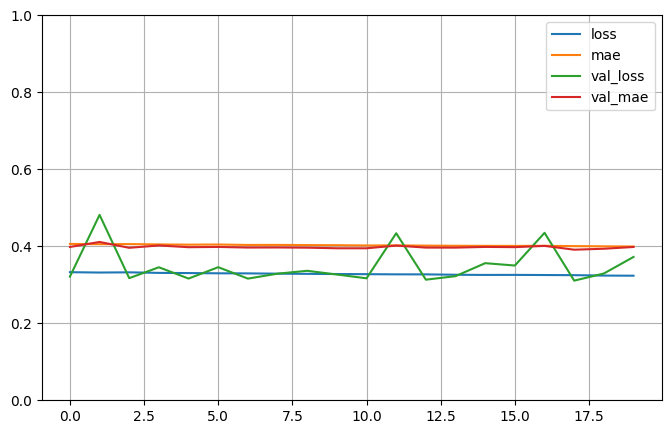

In [44]:
# Plotting the loss and mae values to check convergence
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

In [ ]:
# If you rerun the model_history one more time than the number of epochs will be 40. Picks up from the last value where it stopped. The loss function further goes down if there is scope for convergence

In [45]:
X_new = X_test[:3]

In [46]:
X_new

array([[-1.15780104, -0.28673138, -0.49550877, -0.16618097, -0.02946012,
         0.38899735,  0.19374821,  0.2870474 ],
       [-0.7125531 ,  0.10880952, -0.16332973,  0.20164652,  0.12842117,
        -0.11818174, -0.23725261,  0.06215231],
       [-0.2156101 ,  1.8491895 , -0.57982788,  0.18528489, -0.10429403,
        -0.67694905,  1.00890193, -1.4271529 ]])

In [47]:
y_pred = model.predict(X_new)
print (y_pred)
print(y_test[:3])

1/1 [==============================] - 0s 188ms/step
[[0.5067209]
 [1.5270668]
 [4.3237834]]
[0.477   0.458   5.00001]


## The previous model is build using the sequential approach, Now lets look at the functional API. Here some simple white patterens can be distorted in the sequential process so we will also pass the input to a layer before the output and concat it. In the process we are extracting complex patterns through deep learning(sequential) and also the white patterns through wide learning.

In [48]:
# Lets delete the previous model to free up some resources for the next model training
del model

In [49]:
keras.backend.clear_session()

# Functional API

Not all neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs. For example, a Wide & Deep neural network (see [paper](https://ai.google/research/pubs/pub45413)) connects all or part of the inputs directly to the output layer.

![](Functional.JPG "Title")

In [39]:
X_train.shape[1:]

(8,)

In [51]:
INput_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(INput_)  # I/p given here as a function, hence its called Functional API
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([INput_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[INput_], outputs=[output])

In [52]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_2 (Dense)                (None, 30)           270         ['input_2[0][0]']                
                                                                                                  
 dense_3 (Dense)                (None, 30)           930         ['dense_2[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_2[0][0]',                
                                                                  'dense_3[0][0]']            

In [53]:
model.compile(loss="mean_squared_error", 
              optimizer=keras.optimizers.SGD(learning_rate=1e-3), 
              metrics=['mae'])

In [50]:
model_history = model.fit(X_train, y_train, epochs=80, validation_data=(X_valid, y_valid))

Epoch 1/80
363/363 [==============================] - 1s 4ms/step - loss: 0.3466 - mae: 0.4194 - val_loss: 0.3543 - val_mae: 0.4152
Epoch 2/80
363/363 [==============================] - 1s 4ms/step - loss: 0.3462 - mae: 0.4186 - val_loss: 0.3888 - val_mae: 0.4212
Epoch 3/80
363/363 [==============================] - 1s 4ms/step - loss: 0.3458 - mae: 0.4192 - val_loss: 0.3725 - val_mae: 0.4155
Epoch 4/80
363/363 [==============================] - 1s 3ms/step - loss: 0.3454 - mae: 0.4182 - val_loss: 0.3529 - val_mae: 0.4173
Epoch 5/80
363/363 [==============================] - 1s 2ms/step - loss: 0.3450 - mae: 0.4182 - val_loss: 0.3445 - val_mae: 0.4145
Epoch 6/80
363/363 [==============================] - 1s 2ms/step - loss: 0.3445 - mae: 0.4180 - val_loss: 0.3610 - val_mae: 0.4144
Epoch 7/80
363/363 [==============================] - 1s 2ms/step - loss: 0.3442 - mae: 0.4172 - val_loss: 0.3524 - val_mae: 0.4149
Epoch 8/80
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [51]:
mae_test = model.evaluate(X_test, y_test)


162/162 [==============================] - 0s 1ms/step - loss: 0.3317 - mae: 0.4038


In [52]:
model_history.history

{'loss': [0.3466320335865021,
  0.34615567326545715,
  0.34583336114883423,
  0.3454045057296753,
  0.3450011610984802,
  0.3445073962211609,
  0.3441844582557678,
  0.34375351667404175,
  0.343239426612854,
  0.34268489480018616,
  0.34276726841926575,
  0.34209373593330383,
  0.34165677428245544,
  0.3414151072502136,
  0.34097298979759216,
  0.3407309353351593,
  0.34028252959251404,
  0.3402138352394104,
  0.33941271901130676,
  0.339356929063797,
  0.33897581696510315,
  0.33849433064460754,
  0.33840230107307434,
  0.3379250168800354,
  0.3374386727809906,
  0.3373231291770935,
  0.3371508717536926,
  0.3367393910884857,
  0.3365403115749359,
  0.33608976006507874,
  0.33558523654937744,
  0.3353807032108307,
  0.33537521958351135,
  0.33476510643959045,
  0.3345283567905426,
  0.33431681990623474,
  0.3340170085430145,
  0.3335878252983093,
  0.3334018290042877,
  0.3329392373561859,
  0.33291390538215637,
  0.3326914310455322,
  0.33205080032348633,
  0.3316929340362549,
  0.33

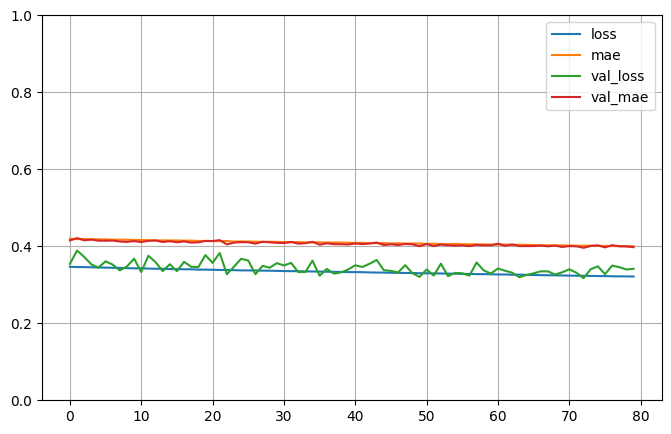

In [53]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

# Saving and Restoring

### The ".h5" file extension is commonly associated with Hierarchical Data Format version 5 (HDF5). HDF5 is a file format that is used to store and organize large amounts of numerical data, particularly in the scientific and data analysis domains.

In [54]:
model.save("my_Func_model.h5")

In [55]:
# To check present working directory
%pwd

'C:\\Users\\Pc'

In [ ]:
# Now lets call this saved model to make predictions

In [61]:
del model

In [62]:
keras.backend.clear_session()

In [58]:
model = keras.models.load_model("my_Func_model.h5")

In [59]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

In [60]:
y_pred = model.predict(X_new)
print (y_pred)

1/1 [==============================] - 0s 63ms/step
[[0.77006525]
 [1.4827392 ]
 [4.4792304 ]]


# Using Callbacks during Training

### Callbacks are check points which allows you to save the model after each epoch, dont have to wait till the entire training is done.

In [ ]:
### Del the model one more time ( Run above codes)

In [54]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [55]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [56]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [67]:
# By using model checkpoint we save the result in a file for each epoch, we dont have to manually create it.
# 02d refers to 2 digit epoch, if it is more than 99, it should be 003d
checkpoint_cb = keras.callbacks.ModelCheckpoint("Model-{epoch:02d}.h5")

In [68]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.9114 - val_loss: 1.3765
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7816 - val_loss: 0.8175
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6903 - val_loss: 0.7328
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6378 - val_loss: 0.5820
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5978 - val_loss: 0.5577
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5630 - val_loss: 0.5694
Epoch 7/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5381 - val_loss: 0.5455
Epoch 8/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5155 - val_loss: 0.4944
Epoch 9/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4934 - val_loss: 0.4704
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4757 - val_loss: 0.4893

In [ ]:
# All 10 models are created in the root directory

In [69]:
del model
keras.backend.clear_session()

In [70]:
model = keras.models.load_model("Model-10.h5")

In [71]:
mse_test = model.evaluate(X_test, y_test,batch_size=5160)

1/1 [==============================] - 0s 98ms/step - loss: 0.4594


In [72]:
print (mse_test)

0.4594361186027527


In [74]:
y_pred = model.predict(X_test)

162/162 [==============================] - 0s 2ms/step


In [75]:
y_diff=y_pred-y_test

In [76]:
y_pred.shape

(5160, 1)

In [78]:
y_diff

array([[ 0.43767452,  0.45667452, -4.08533548, ..., -0.26232548,
        -1.71632548, -3.90032548],
       [ 0.94636965,  0.96536965, -3.57664035, ...,  0.24636965,
        -1.20763035, -3.39163035],
       [ 2.64103246,  2.66003246, -1.88197754, ...,  1.94103246,
         0.48703246, -1.69696754],
       ...,
       [ 0.89700806,  0.91600806, -3.62600194, ...,  0.19700806,
        -1.25699194, -3.44099194],
       [ 2.06185651,  2.08085651, -2.46115349, ...,  1.36185651,
        -0.09214349, -2.27614349],
       [ 3.23987031,  3.25887031, -1.28313969, ...,  2.53987031,
         1.08587031, -1.09812969]])

### Best Model Only

In [88]:
del model
keras.backend.clear_session()

In [89]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [90]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [91]:
# save_best_only will save only that file which gives the least loss function
checkpoint_cb = keras.callbacks.ModelCheckpoint("Best_Model.h5", save_best_only=True)

In [92]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.9761 - val_loss: 1.2951
Epoch 2/10
363/363 [==============================] - 1s 1ms/step - loss: 0.7891 - val_loss: 0.6742
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6691 - val_loss: 0.6425
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6142 - val_loss: 0.5846
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5743 - val_loss: 0.5338
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5387 - val_loss: 0.5050
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5116 - val_loss: 0.4821
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4889 - val_loss: 0.4489
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4699 - val_loss: 0.4322
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4553 - val_loss: 0.4200

In [93]:
model = keras.models.load_model("Best_Model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 1s 2ms/step - loss: 0.4476


### Best Model Only

In [ ]:
# Using early stopping method. If the score does not improve after certain epochs , we tell the model to stop.

In [57]:
del model
keras.backend.clear_session()

In [58]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [59]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3),metrics=['mae'])

In [97]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("early_stop_model.h5", save_best_only=True)

In [98]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)

#     patience: Number of epochs with no improvement after which training will be stopped.

In [99]:
history = model.fit(X_train, y_train, epochs=200,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/200
363/363 [==============================] - 2s 4ms/step - loss: 1.8918 - val_loss: 1.1631
Epoch 2/200
363/363 [==============================] - 2s 6ms/step - loss: 0.7076 - val_loss: 0.6398
Epoch 3/200
363/363 [==============================] - 1s 1ms/step - loss: 0.6201 - val_loss: 0.5751
Epoch 4/200
363/363 [==============================] - 1s 1ms/step - loss: 0.5674 - val_loss: 0.5292
Epoch 5/200
363/363 [==============================] - 1s 1ms/step - loss: 0.5305 - val_loss: 0.4927
Epoch 6/200
363/363 [==============================] - 1s 1ms/step - loss: 0.5013 - val_loss: 0.4655
Epoch 7/200
363/363 [==============================] - 1s 1ms/step - loss: 0.4798 - val_loss: 0.4450
Epoch 8/200
363/363 [==============================] - 1s 1ms/step - loss: 0.4626 - val_loss: 0.4299
Epoch 9/200
363/363 [==============================] - 1s 1ms/step - loss: 0.4492 - val_loss: 0.4208
Epoch 10/200
363/363 [==============================] - 1s 1ms/step - loss: 0.4385 - val_lo

In [100]:
model = keras.models.load_model("early_stop_model.h5")
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 1s 2ms/step - loss: 0.3607


In [4]:
mae_test = model.evaluate(X_test, y_test)

NameError: name 'model' is not defined